# 7 Principle Component Analysis and K-Means Clustering
# 7.2 PCA

## Part 1: Load Example Dataset

In [52]:
# import key libraries (remember to pip install numpy etc. first)
import numpy as np
import sys
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# import csv data
PATH="./data/"
DATA="ex7data1.mat"

import scipy.io
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y
X = mat['X']

Visualizing example dataset for PCA.




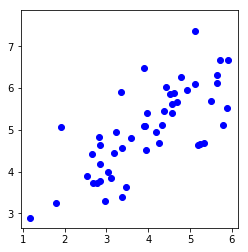

In [91]:
def pltData():
    plt. plot(X[:, 0], X[:, 1], 'bo')
    plt.axis([0.5, 6.5, 2, 8])
    plt.axis('square');

print('Visualizing example dataset for PCA.\n\n')
pltData()

## Part 2: Principal Component Analysis

In [48]:
def featureNormalize(X):
#FEATURENORMALIZE Normalizes the features in X 
#   FEATURENORMALIZE(X) returns a normalized version of X where
#   the mean value of each feature is 0 and the standard deviation
#   is 1. This is often a good preprocessing step to do when
#   working with learning algorithms.

    mu = np.mean(X, axis=0)
    X_norm = X-mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm = X_norm/sigma

    return X_norm, mu, sigma

In [72]:
def pca(X):
#PCA Run principal component analysis on the dataset X
#   [U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X
#   Returns the eigenvectors U, the eigenvalues (on diagonal) in S

    # Useful values
    m, n = X.shape

    # You need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)

    sigma = X.T @ X / m #  Covariance of X: n x m x m x n = n x n

    U, S, Vh = np.linalg.svd (sigma) # find the eigenvectors (Principal Components) U and S diagnal matrix which helps with the projection error or invcerse which is the variance retained
    return U, S

In [78]:
def drawLine(p1, p2):
    #DRAWLINE Draws a line from point p1 to point p2
    #   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
    #   current figure

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '-k', linewidth=2)

In [79]:
print('Running PCA on example dataset.\n\n')

Running PCA on example dataset.




Top eigenvector: 

 U(:,1) =  -0.7071067811865475 -0.7071067811865477

(you should expect to see -0.707107 -0.707107)



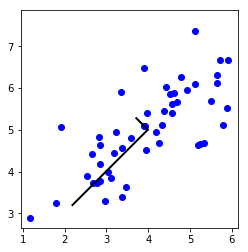

In [93]:
#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Compute mu, the mean of the each feature

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
pltData()
drawLine(mu, mu + 1.5 * S[0] * U[:,0].T);
drawLine(mu, mu + 1.5 * S[1] * U[:,1].T);

print('Top eigenvector: \n');
print(' U(:,1) = ', U[0,0], U[1,0])
print('\n(you should expect to see -0.707107 -0.707107)\n');


## Part 3: Dimension Reduction